# Exploratory Data Analysis (EDA)

## Importing the dataset

In [141]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('Data-preprocess.csv')

# Data Preprocessing

### 1. Feature Imputation

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64


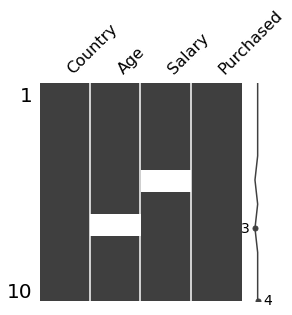

In [112]:
# 1. check missingness：isna() or isnull() 
print(dataset.isna().sum())

import missingno as mn
mn.matrix(dataset,figsize=(4,4));

In [79]:
## 1.1 Impute the missing data by mean/median/most frequent/constant
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(dataset.iloc[:, 1:3])
dataset.iloc[:, 1:3] = imputer.transform(dataset.iloc[:, 1:3])
## 1.2 Impute with forward fill & groupby
dataset[['Age', 'Salary']] = dataset.groupby('Country')['Age','Salary'].ffill()

## 1.3 Replace N/A by zero
dataset.replace(nan,0)

## 1.4 Drop missing value
dataset.dropna().reset_index(drop=True)

## 1.5 Defining KNN imputer with neighbors, for numeric columns
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=5)
dataset[['Age', 'Salary']] = knn.fit_transform(dataset[['Age', 'Salary']])

In [161]:
dataset[(dataset['Age'] > 30) & (dataset['Purchased'] == 'No')]

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
3,Spain,38.0,61000.0,No
8,Germany,50.0,83000.0,No


### 2. Feature Encoding

In [49]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [198]:
## 2. Encode categorical data
### 2.1 Encode the Independent Variable: turn unique values into [1,0,0], [0,1,0], etc.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

### 2.2 Encode the Dependent Variable: turn categorical into numeric [0,1,2,3..]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

### 2.3 Embedding encodings

-- DATA SPLITING: Split the dataset into the Training set and Test set --

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

### 3. Feature Normalization/Scaling

In [199]:
# Feature scaling should be done after data split
# 3.1 Method1: Scaling/normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler() #min-max scaling, [0,1]
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:]) # test data transformed using the same scale for train data

# 3.2 Method2: Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() #mean of 0, sd of 1. good to deal with outliers.
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])

### 4. Feature Engineering

#### 4.1 Date

In [88]:
# deal with date
# change one column into date time 
dataset.iloc[:,1] = pd.to_datetime(dataset.iloc[:,1])
# get the year/month/day/day_of_month/day_of_year
dataset.iloc[:,1].dt.year
# get today
from datetime import datetime
datetime.today()

#### 4.2 Bin Values into Discrete Intervals (age groups)

In [82]:
# Bin Values into Discrete Intervals
dataset['age_by_decade'] = pd.cut(x=dataset['Age'], bins=[10, 19, 29, 39, 49, 59], labels=['10s', '20s', '30s', '40s', '50s'])

In [85]:
# Saving a DataFrame to a CSV file
dataset.to_csv('dataset.csv', encoding='utf-8')

In [104]:
dataset.iloc[2]

Country                                Germany
Age              1970-01-01 00:00:00.000000030
Salary                                 54000.0
Purchased                                   No
age_by_decade                              30s
Name: 2, dtype: object

In [110]:
dataset['Country'].str.len()

0    6
1    5
2    7
3    5
4    7
5    6
6    5
7    6
8    7
9    6
Name: Country, dtype: int64